<a href="https://colab.research.google.com/github/Caturputraramadani/MachineLearningbyUnivPertamina/blob/main/DeepFace_PengMas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python

In [ ]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]

In [ ]:
img1 = "/content/drive/MyDrive/Foto/joji.jpg"

In [ ]:
image = DeepFace.detectFace(img1)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


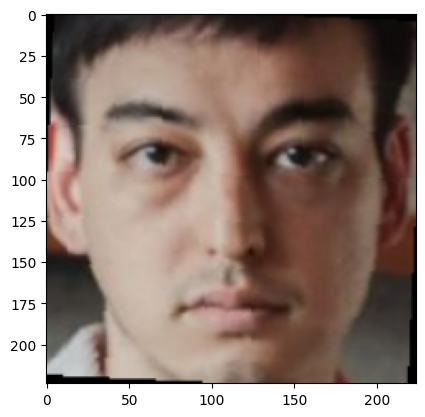

In [ ]:
plt.imshow(image)

In [ ]:
df = DeepFace.find(img_path=img1, db_path = '/content/drive/MyDrive/db/', model_name = models[1], enforce_detection=False)

There are  8  representations found in  representations_facenet.pkl
find function lasts  0.3503916263580322  seconds


In [ ]:
df

[Empty DataFrame
 Columns: [identity, source_x, source_y, source_w, source_h, Facenet_cosine]
 Index: []]

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))   # ubah ini jadi find
        if img is not None:
            images.append(img)
    return images


*   Load image dari folder
*   find image dari dataset
*   verify image hasil find dengan target
*   hitung akurasi (correct/total)



In [ ]:
images = load_images_from_folder("/content/drive/MyDrive/Testing")

In [ ]:
images

[array([[[90, 88, 87],
         [90, 88, 87],
         [90, 88, 87],
         ...,
         [90, 86, 85],
         [90, 86, 85],
         [90, 86, 85]],
 
        [[90, 88, 87],
         [90, 88, 87],
         [90, 88, 87],
         ...,
         [90, 86, 85],
         [90, 86, 85],
         [90, 86, 85]],
 
        [[90, 88, 87],
         [90, 88, 87],
         [90, 88, 87],
         ...,
         [90, 86, 85],
         [90, 86, 85],
         [90, 86, 85]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8)]

In [ ]:
def verify(img1_path,img2_path, model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)

    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()

    output = DeepFace.verify(img1_path,img2_path, model_name=model_name)
    print(output)

    verification = output['verified']

    if verification:
       print('Benar')
    else:
       print('Salah')

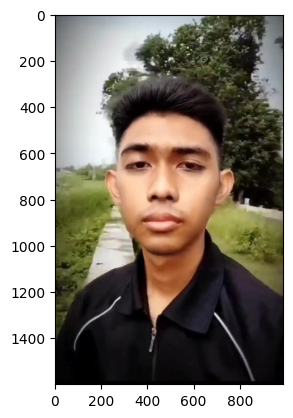

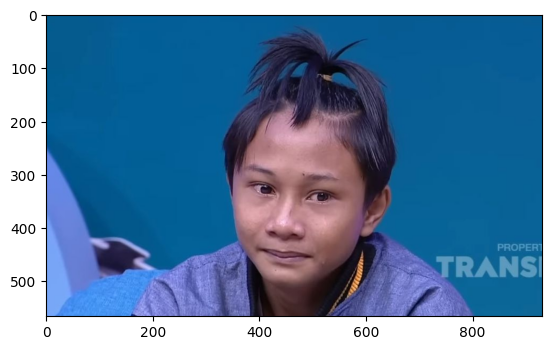

{'verified': True, 'distance': 0.27187157641438575, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 184, 'y': 414, 'w': 577, 'h': 577}, 'img2': {'x': 314, 'y': 216, 'w': 295, 'h': 295}}, 'time': 2.81}
Benar


In [ ]:
verify("/content/drive/MyDrive/Testing/Adit.jpeg","/content/drive/MyDrive/db/FajarSadboy.jpg", model_name = models[0])